In this notebook, I'm going to attempt to balance the budget with the terms that I'm aware we need. I'm going to use this notebook to also test out what to use for the correct mixed layer depth over a period of time.

In [3]:
#accessing netcdf files from Hector's folders
import os, glob, sys
sys.path.append("//nobackup//amondal//Python//Hector_Python_Scripts")
sys.path.append("//nobackup/amondal//Python//mit_geos_analysis")
#playing with netcdf - xarray
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import dask_ndfilters
# How about visualization?
%matplotlib inline
from xmovie import Movie
import xrscipy.signal as dsp
import xrft
import scipy.signal as scp
import netCDF4
import xgcm
from netCDF4 import Dataset
import time as tm
from xmitgcm import open_mdsdataset
import time as tm
import pylab as plt
from llcmap_bi_split import LLCMap_bi_split
from face_connections import face_connections
from llcmap_nea_split import LLCMap_nea_split
from timeline_MITgcm import timeline
from datetime import datetime, timedelta
import importlib
from GetNCDataSet import getNCDataSet
from MITllc2160Depth import *
#GetNCDataSet = importlib.reload(GetNCDataSet)

from dask.distributed import Client
client = Client(memory_limit='30GB',n_workers = 10, threads_per_worker=1)

In [22]:
fol = "/nobackup/amondal/NCData/20210802_FBB/"
VAR = "oceQnet"
firstlevel = 0
finallevel = 1

firstVar = VAR + "_" + str(firstlevel)
vardir = fol + firstVar + '/'
vfiles = sorted(os.listdir(vardir))
"""
vdirfiles = []
for subindex in range(0,len(vfiles)):
    vdirfiles.append(vardir+vfiles[subindex])
vdirset= xr.open_mfdataset(vdirfiles, chunks={'latitude':1,'longitude':1}, concat_dim='time',parallel=True,combine='nested')
print('Time combined dataset has been opened.')
vfullset = vdirset
print('I concatenated another Z-layer')
for index in range(1,finallevel):
    vi = VAR+"_" + str(index)
    vardir = fol + vi + '/'
    vfiles = sorted(os.listdir(vardir))
    vdirfiles = []
    for subindex in range(0,len(vfiles)):
        vdirfiles.append(vardir+vfiles[subindex])
    vdirset= xr.open_mfdataset(vdirfiles, chunks={'latitude':1,'longitude':1}, concat_dim='time',parallel=True,combine='nested')
    print('Time combined dataset has been opened.')
    vfullset = xr.concat([vfullset, vdirset], dim='Zlayers')
    print('I concatenated another Z-layer')
U = vfullset
"""

'\nvdirfiles = []\nfor subindex in range(0,len(vfiles)):\n    vdirfiles.append(vardir+vfiles[subindex])\nvdirset= xr.open_mfdataset(vdirfiles, chunks={\'latitude\':1,\'longitude\':1}, concat_dim=\'time\',parallel=True,combine=\'nested\')\nprint(\'Time combined dataset has been opened.\')\nvfullset = vdirset\nprint(\'I concatenated another Z-layer\')\nfor index in range(1,finallevel):\n    vi = VAR+"_" + str(index)\n    vardir = fol + vi + \'/\'\n    vfiles = sorted(os.listdir(vardir))\n    vdirfiles = []\n    for subindex in range(0,len(vfiles)):\n        vdirfiles.append(vardir+vfiles[subindex])\n    vdirset= xr.open_mfdataset(vdirfiles, chunks={\'latitude\':1,\'longitude\':1}, concat_dim=\'time\',parallel=True,combine=\'nested\')\n    print(\'Time combined dataset has been opened.\')\n    vfullset = xr.concat([vfullset, vdirset], dim=\'Zlayers\')\n    print(\'I concatenated another Z-layer\')\nU = vfullset\n'

In [23]:
vfiles

['oceQnet_2020030100.nc',
 'oceQnet_2020030101.nc',
 'oceQnet_2020030102.nc',
 'oceQnet_2020030103.nc',
 'oceQnet_2020030104.nc',
 'oceQnet_2020030105.nc',
 'oceQnet_2020030106.nc',
 'oceQnet_2020030107.nc',
 'oceQnet_2020030108.nc',
 'oceQnet_2020030109.nc',
 'oceQnet_2020030110.nc',
 'oceQnet_2020030111.nc',
 'oceQnet_2020030112.nc',
 'oceQnet_2020030113.nc',
 'oceQnet_2020030114.nc',
 'oceQnet_2020030115.nc',
 'oceQnet_2020030116.nc',
 'oceQnet_2020030117.nc',
 'oceQnet_2020030118.nc',
 'oceQnet_2020030119.nc',
 'oceQnet_2020030120.nc',
 'oceQnet_2020030121.nc',
 'oceQnet_2020030122.nc',
 'oceQnet_2020030123.nc',
 'oceQnet_2020030200.nc',
 'oceQnet_2020030201.nc',
 'oceQnet_2020030202.nc',
 'oceQnet_2020030203.nc',
 'oceQnet_2020030204.nc',
 'oceQnet_2020030205.nc',
 'oceQnet_2020030206.nc',
 'oceQnet_2020030207.nc',
 'oceQnet_2020030208.nc',
 'oceQnet_2020030209.nc',
 'oceQnet_2020030210.nc',
 'oceQnet_2020030211.nc',
 'oceQnet_2020030212.nc',
 'oceQnet_2020030213.nc',
 'oceQnet_20

In [8]:
Qn

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 25, time: 748)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time
Data variables:
    oceQnet  (time, lat, lon) float64 dask.array<chunksize=(1, 25, 25), meta=np.ndarray>

In [4]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20210811_BudgetBal_2day/"
VAR = "Zeta"
firstlevel = 0
finallevel = 1
Zeta = getNCDataSet(fol,VAR, firstlevel,finallevel)

Time combined dataset has been opened.
I concatenated the first Z-layer


In [5]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20210802_FBB/"
VAR = "KPPhbl"
firstlevel = 0
finallevel = 1
hbl = getNCDataSet(fol,VAR, firstlevel,finallevel)

Time combined dataset has been opened.
I concatenated the first Z-layer


In [6]:
Zeta

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 25, time: 48)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time
Data variables:
    Zeta     (time, lat, lon) float64 dask.array<chunksize=(1, 25, 25), meta=np.ndarray>

In [7]:
hbl

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 25, time: 72)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time
Data variables:
    KPPhbl   (time, lat, lon) float64 dask.array<chunksize=(1, 25, 25), meta=np.ndarray>

In [6]:
import scipy.io
os.chdir("//nobackup//amondal//Python//Hector_Python_Scripts")
print(os.getcwd())
thk = scipy.io.loadmat('thk90')

thk90 = thk['thk90']
dpt90 = thk['dpt90']
#dpt90
depth_tick_nums = thk['dpt90'][0, 0:90]
#depth_tick_nums
depth = depth_tick_nums
np.max(np.nonzero(np.where(depth < 250, depth, 0)))

/nobackupp12/amondal/Python/Hector_Python_Scripts


29

In [26]:
np.max(np.nonzero(np.where(depth < 250, depth, 0)))

29

In [53]:
depth

array([5.000000e-01, 1.570000e+00, 2.790000e+00, 4.185000e+00,
       5.780000e+00, 7.595000e+00, 9.660000e+00, 1.201000e+01,
       1.468000e+01, 1.770500e+01, 2.112500e+01, 2.499000e+01,
       2.934500e+01, 3.424000e+01, 3.972500e+01, 4.585500e+01,
       5.269000e+01, 6.028000e+01, 6.868500e+01, 7.796500e+01,
       8.817500e+01, 9.937000e+01, 1.116000e+02, 1.249150e+02,
       1.393650e+02, 1.549900e+02, 1.718250e+02, 1.899000e+02,
       2.092350e+02, 2.298550e+02, 2.517700e+02, 2.749850e+02,
       2.995050e+02, 3.253200e+02, 3.524200e+02, 3.807900e+02,
       4.104100e+02, 4.412550e+02, 4.733050e+02, 5.065400e+02,
       5.409350e+02, 5.764650e+02, 6.131100e+02, 6.508550e+02,
       6.896850e+02, 7.295950e+02, 7.705850e+02, 8.126600e+02,
       8.558350e+02, 9.001350e+02, 9.455950e+02, 9.922600e+02,
       1.040180e+03, 1.089425e+03, 1.140080e+03, 1.192235e+03,
       1.246005e+03, 1.301520e+03, 1.358920e+03, 1.418375e+03,
       1.480075e+03, 1.544225e+03, 1.611060e+03, 1.6808

In [75]:
depth[21]

99.37

In [29]:
depth[32]

299.505

In [7]:
latsel = 34.5
lonsel = -65.5
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')

In [38]:
hblsel.values[0,32]

277.7732238769531

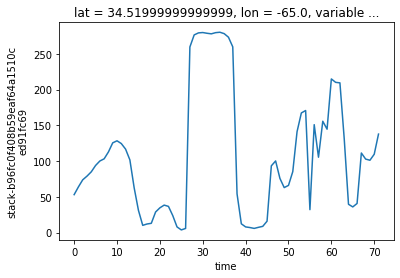

In [18]:
%matplotlib inline
hblsel.plot()

In [40]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20210811_BudgetBal_2day/"
VAR = "U"
firstlevel = 0
finallevel = 22
U = getNCDataSet(fol,VAR, firstlevel,finallevel)
V = getNCDataSet(fol,'V', firstlevel,finallevel)

Time combined dataset has been opend.
I concatenated the first Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined dataset hass been opened
I concatenated another Z-layer
Time combined datas

In [132]:
U['U']

<xarray.DataArray 'U' (Zlayers: 22, time: 48, lat: 25, lon: 25)>
dask.array<concatenate, shape=(22, 48, 25, 25), dtype=float64, chunksize=(1, 1, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: Zlayers, time

In [8]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20210811_BudgetBal_2day/"
firstlevel = 0
finallevel = 22
#Theta = getNCDataSet(fol,'Theta', firstlevel,finallevel)
#DxTheta = getNCDataSet(fol,'DxTheta', firstlevel,finallevel)
#DyTheta= getNCDataSet(fol,'DyTheta', firstlevel,finallevel)
Q = getNCDataSet(fol,'oceQnet', 0,1)


Time combined dataset has been opened.
I concatenated the first Z-layer


In [63]:
Usel = U['U'].sel(lat=latsel,lon=lonsel,method='nearest')
Vsel = V['V'].sel(lat=latsel,lon=lonsel,method='nearest')
#Vsel.rename('V')
Tsel = Theta['Theta'].sel(lat=latsel,lon=lonsel,method='nearest')
#Tsel.rename('Theta')
DxT = DxTheta['DxTheta'].sel(lat=latsel,lon=lonsel,method='nearest')
#DxT.rename('DxTheta')
DyT = DyTheta['DyTheta'].sel(lat=latsel,lon=lonsel,method='nearest')
#DyT.rename('DyTheta')

In [67]:
Vsel

<xarray.DataArray 'V' (Zlayers: 22, time: 48)>
dask.array<getitem, shape=(22, 48), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: Zlayers, time

In [10]:
Qsel = Q['oceQnet'].sel(lat=latsel,lon=lonsel,method='nearest')
Qsel

<xarray.DataArray 'oceQnet' (time: 48)>
dask.array<getitem, shape=(48,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [120]:
HAdv = -1*(Usel*DxT).compute() -(Vsel*DyT).compute()

In [121]:
HAdv

<xarray.DataArray (Zlayers: 22, time: 48)>
array([[ 2.26777075e-06, -1.44731285e-06, -3.31879630e-06, ...,
        -3.41393061e-06,  8.80464789e-06,  2.61129094e-05],
       [ 2.04501419e-06, -1.46636201e-06, -3.18144881e-06, ...,
        -2.62334376e-06,  1.14914528e-05,  2.89771037e-05],
       [ 1.92867548e-06, -1.48840955e-06, -3.13260349e-06, ...,
        -1.89306713e-06,  1.31181810e-05,  3.03538636e-05],
       ...,
       [ 8.30267404e-06,  9.79694854e-06,  4.67355484e-06, ...,
         6.80328421e-06,  1.97504657e-05,  1.93029529e-05],
       [ 4.69221115e-06, -2.29613599e-07, -3.78502963e-06, ...,
         5.88856319e-06,  1.65972111e-05,  1.54937287e-05],
       [ 2.95701817e-06, -5.44575370e-06, -1.04972304e-05, ...,
         5.14484642e-06,  1.37498464e-05,  1.25241489e-05]])
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: Zlayers, time

In [122]:
Hadv_avg = HAdv.mean(dim='Zlayers')
Hadv_avg

<xarray.DataArray (time: 48)>
array([ 2.39120400e-06, -1.50384619e-07, -2.49230214e-06, -4.25372068e-06,
       -5.10044861e-06, -5.99747183e-06, -6.86848598e-06, -6.08817788e-06,
       -1.78852561e-06,  4.42130642e-06,  6.57143136e-06,  4.15973762e-06,
        3.39228735e-07, -3.41925850e-06, -7.51163554e-06, -9.97017762e-06,
       -9.66284221e-06, -7.51751158e-06, -5.35573612e-06, -3.54948736e-06,
       -1.91382209e-06, -6.98276948e-07, -3.81199912e-06, -9.57919766e-06,
       -1.57700072e-05, -2.15289994e-05, -2.30777772e-05, -1.53249044e-05,
       -2.61362757e-06,  3.74196339e-06,  3.09723946e-06, -8.64293221e-07,
       -4.61645552e-06, -5.24288363e-06, -3.24922696e-06, -1.03221871e-06,
        6.26068320e-07,  1.36096768e-06,  2.02982513e-06,  2.34124128e-06,
        2.06684569e-06,  2.59383866e-07, -3.00630356e-06, -5.80109521e-06,
       -4.26085922e-06,  4.82770780e-06,  1.96029407e-05,  2.90295243e-05])
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [68]:
T_avg = Tsel.mean(dim='Zlayers')

In [69]:
T_avg

<xarray.DataArray 'Theta' (time: 48)>
dask.array<mean_agg-aggregate, shape=(48,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [110]:
T_avg

<xarray.DataArray 'Theta' (time: 48)>
dask.array<mean_agg-aggregate, shape=(48,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [113]:
DtT = T_avg.diff(dim='time')

In [115]:
DtT = DtT.compute()

In [118]:
#this needs units of Celsius over seconds, not Celsius over hours
DtT = DtT / 3600

I didn't realize that I hadn't properly loaded all the right dates. So i have to wait for that to happen

In [11]:
#I can start prepping code for a balance
# starting to play with Theta values and I'll have to load U and V -- but what are the constants we need

rhoConst = 1027.5 #kg/m^3
H = depth[21] #m - we can vary this as a test
Cp = 1*(10**3) # J / (kg K)
#K2 = 0
#K4 = 0
HeatFlux = Qsel / (rhoConst * Cp * H) # add in height

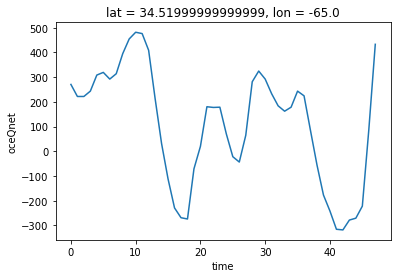

In [105]:
Qsel.plot()

In [102]:
rhoConst*H*Cp

102102675.0

In [103]:
500 / 102102675.0

4.897031346142498e-06

In [79]:
ekman = zetasel * T_avg / H

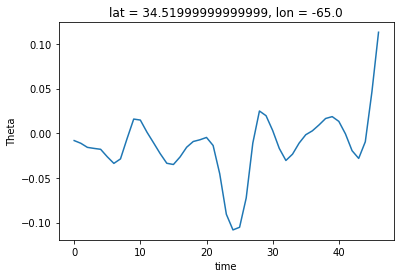

In [117]:
%matplotlib inline
DtT.plot()

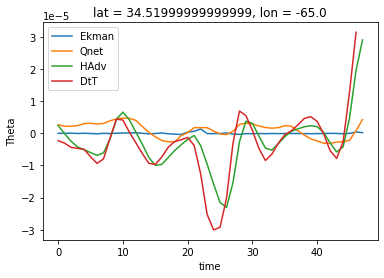

In [129]:
%matplotlib inline
ekman.plot()
HeatFlux.plot()
Hadv_avg.plot()
DtT.plot()
plt.legend(labels=['Ekman', 'Qnet', 'HAdv', 'DtT'])
#how do I put a legend in?

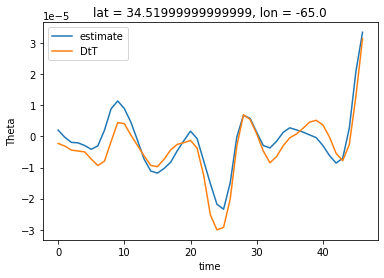

In [128]:
%matplotlib inline
estimate = ekman.compute() + Hadv_avg.compute() + HeatFlux.compute()
estimate[1:].plot()
DtT.plot()
#how do I put a legend in?
plt.legend(labels=['estimate', 'DtT'])

Load in the correct data for the correct period of time. Average over depth for Theta, dTheta/dt, and then advection in sum.

If data isn't still loaded - calculate advection before differentiation. Don't calculate U and V separately cuz that sucks butt.

Also, test the loading of HAdv (horizontal advection)

In [133]:
To = Theta['Theta'].compute()
DxTo = DxTheta['DxTheta'].compute() 
DyTo = DyTheta['DyTheta'].compute()
Qo = Q['oceQnet'].compute()
Zo = Zeta['Zeta'].compute()
Uo = U['U'].compute()
Vo = V['V'].compute()

In [137]:
Toa = To.mean(dim='Zlayers')
DxToa = DxTo.mean(dim='Zlayers')
DyToa = DyTo.mean(dim='Zlayers')
UoA = Uo.mean(dim='Zlayers')
VoA = Vo.mean(dim='Zlayers')

In [144]:
Hadv = -1*UoA * DxToa - VoA*DyToa
HFo = Qo / (rhoConst*Cp*H)
Eko = Zo*Toa / H
dTo = Toa.diff(dim='time') / 3600
Bal = Hadv+HFo + Eko

In [141]:
Bal

<xarray.DataArray (time: 48, lat: 25, lon: 25)>
array([[[ 1.16856717e-05,  1.63611628e-05,  1.28601435e-05, ...,
          4.16166025e-06,  5.58484553e-06,  5.17426303e-06],
        [ 1.02854240e-05,  1.85168815e-05,  1.47949579e-05, ...,
          4.09584314e-06,  4.75610942e-06,  3.65911832e-06],
        [ 1.03561096e-05,  2.05484716e-05,  1.66672731e-05, ...,
          3.97815077e-06,  3.69245375e-06,  2.59682686e-06],
        ...,
        [-3.00760994e-05, -6.37255782e-05, -6.61177687e-05, ...,
          8.79022228e-06,  2.37519734e-05,  1.66681846e-05],
        [ 1.66406901e-05, -2.35474510e-06, -5.19369351e-05, ...,
          1.83552412e-05,  5.30916132e-06, -1.07299459e-05],
        [ 4.83323223e-05,  3.10186412e-05, -3.36649610e-05, ...,
         -7.71642411e-06, -2.22276958e-05, -1.70153099e-05]],

       [[ 9.49948658e-06,  1.49347040e-05,  1.42158518e-05, ...,
          3.59351071e-06,  5.18905573e-06,  5.75228826e-06],
        [ 7.21465104e-06,  1.60161146e-05,  1.66397363e-05, ...,
          3.60166595e-06,  4.62531409e-06,  4.33212975e-06],
        [ 6.63387546e-06,  1.70263222e-05,  1.89964222e-05, ...,
          3.65095938e-06,  4.08209953e-06,  3.39522685e-06],
...
        [ 2.12938052e-05,  7.74613449e-06,  1.00171081e-05, ...,
          4.99227989e-06, -1.45528244e-06,  2.04590356e-05],
        [ 3.63280043e-05,  2.23610168e-05,  2.64453300e-05, ...,
          1.38923958e-06,  1.57482138e-05,  2.18115299e-05],
        [ 4.93131090e-05,  4.42094007e-05,  7.59319543e-05, ...,
          5.86622802e-06,  8.93572016e-06,  7.05485400e-06]],

       [[-7.05260477e-07, -6.50852550e-07,  1.06456460e-06, ...,
          1.05237579e-06,  1.61839093e-06,  2.19897768e-06],
        [-2.63659572e-07,  4.18784120e-07,  1.23399081e-06, ...,
         -6.09348384e-08,  3.21252586e-07,  1.15297424e-06],
        [ 6.38416720e-07,  1.61740351e-06,  1.98209730e-06, ...,
         -1.21237210e-06,  8.97456881e-07,  1.74333444e-06],
        ...,
        [ 3.71376904e-05,  1.43055322e-05,  8.38360886e-06, ...,
          5.74737053e-05,  4.56299627e-06,  7.78752715e-06],
        [ 5.04236834e-05,  3.19736385e-05,  2.16114812e-05, ...,
          1.72187996e-05,  6.06844006e-06,  2.03840809e-05],
        [ 6.39121136e-05,  4.57965619e-05,  5.04221010e-05, ...,
          1.45060341e-06,  8.68492743e-06,  1.02856595e-05]]])
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time

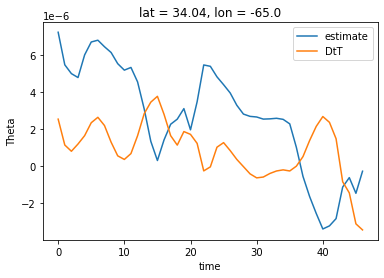

In [150]:
%matplotlib inline
Bal.sel(lat = 34.04, lon = -65, method='nearest')[1:].plot()
dTo.sel(lat = 34.04, lon = -65, method='nearest').plot()
#how do I put a legend in?
plt.legend(labels=['estimate', 'DtT'])

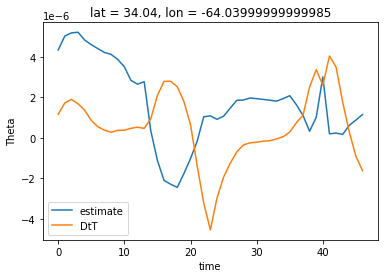

In [151]:
%matplotlib inline
Bal.sel(lat = 34.04, lon = -64.04, method='nearest')[1:].plot()
dTo.sel(lat = 34.04, lon = -64.04, method='nearest').plot()
#how do I put a legend in?
plt.legend(labels=['estimate', 'DtT'])

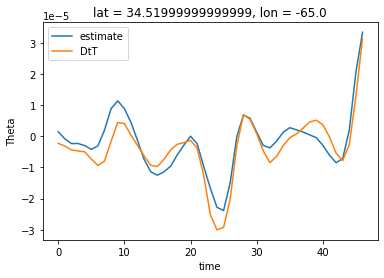

In [152]:
%matplotlib inline
Bal.sel(lat = latsel, lon = lonsel, method='nearest')[1:].plot()
dTo.sel(lat = latsel, lon = lonsel, method='nearest').plot()
#how do I put a legend in?
plt.legend(labels=['estimate', 'DtT'])

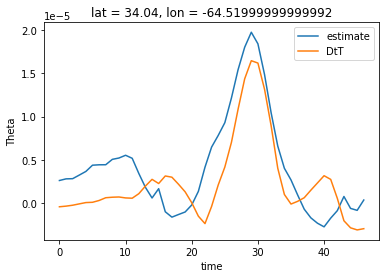

In [153]:
%matplotlib inline
Bal.sel(lat = 34.04, lon = -64.5, method='nearest')[1:].plot()
dTo.sel(lat = 34.04, lon = -64.5, method='nearest').plot()
#how do I put a legend in?
plt.legend(labels=['estimate', 'DtT'])

So far, this looks like a really good start. Maybe we can analyze temperature profiles in depth to see what might be determining a good mixed layer height.

In [154]:
Theta

<xarray.Dataset>
Dimensions:  (Zlayers: 22, lat: 25, lon: 25, time: 48)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: Zlayers, time
Data variables:
    Theta    (Zlayers, time, lat, lon) float64 dask.array<chunksize=(1, 1, 25, 25), meta=np.ndarray>

In [156]:
Tta = Theta['Theta'].mean(dim='time')
Tta

<xarray.DataArray 'Theta' (Zlayers: 22, lat: 25, lon: 25)>
dask.array<mean_agg-aggregate, shape=(22, 25, 25), dtype=float64, chunksize=(1, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: Zlayers

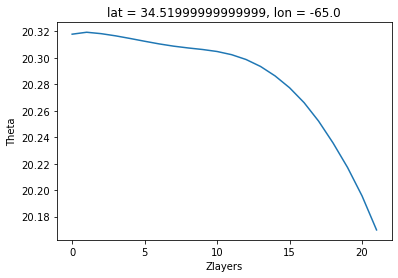

In [157]:
%matplotlib inline
Tta.sel(lat=latsel,lon=lonsel,method='nearest').plot()

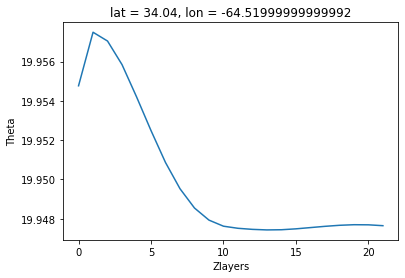

In [160]:
%matplotlib inline
Tta.sel(lat = 34.04, lon = -64.5,method='nearest').plot()

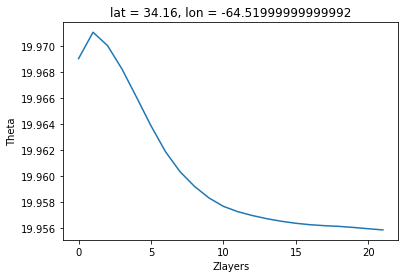

In [161]:
%matplotlib inline
Tta.sel(lat = 34.16, lon = -64.5,method='nearest').plot()

In [15]:
# good - now, let me make a bunch of .nc files:
fol = "/nobackup/amondal/NCData/20210811_BudgetBal_2day_250m/"
VAR = "Theta"
firstlevel = 0
finallevel = 33
Theta = getNCDataSet(fol,VAR, firstlevel,finallevel)
HAdv = getNCDataSet(fol, 'HAdv', 0, 33)

Time combined dataset has been opened.
I concatenated the first Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been 

In [16]:
To = Theta['Theta'].compute()
Tta = Theta['Theta'].mean(dim='time')
Tta

<xarray.DataArray 'Theta' (Zlayers: 33, lat: 25, lon: 25)>
dask.array<mean_agg-aggregate, shape=(33, 25, 25), dtype=float64, chunksize=(1, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: Zlayers

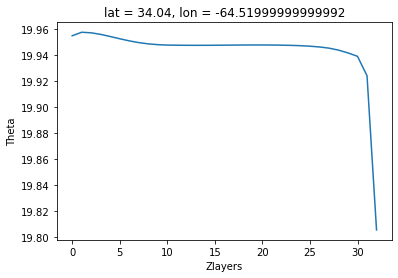

In [11]:
%matplotlib inline
Tta.sel(lat = 34.04, lon = -64.5,method='nearest').plot()
#plt.gca().invert_yaxis()

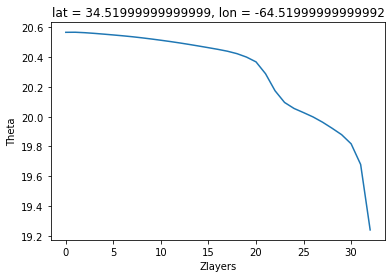

In [12]:
%matplotlib inline
Tta.sel(lat = 34.5, lon = -64.5,method='nearest').plot()

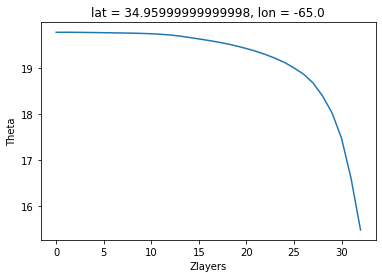

In [13]:
%matplotlib inline
Tta.sel(lat = 35, lon = -65,method='nearest').plot()

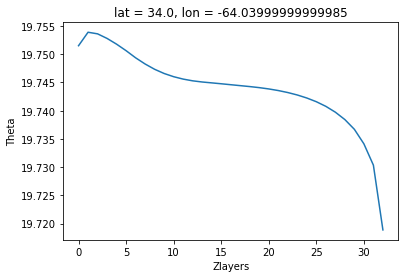

In [14]:
%matplotlib inline
Tta.sel(lat = 34, lon = -64,method='nearest').plot()

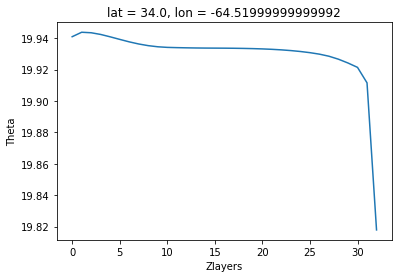

In [15]:
%matplotlib inline
Tta.sel(lat = 34, lon = -64.5,method='nearest').plot()

So what we're trying to do now, seeing that we have some cells with really good balance and others without, is use kpphbl to have a spatially and temporally variable kpphbl. Patrice suggested seeing how the budget balance looks in adjacent cells. Dimitris suggested taking the deepest value of KPPhbl during a period (I'm using 1 day) and using that as the balance for every such period (so for 24 hrs). The mixed layer will be deepest right before the sun rises (when the sun sets, you start losing heat to the atmosphere and suddenly you have colder water over warmer air which increases the instability in the boundary layer and thus it's depth. 

In [6]:
hbl

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 25, time: 72)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time
Data variables:
    KPPhbl   (time, lat, lon) float64 dask.array<chunksize=(1, 25, 25), meta=np.ndarray>

Note that noon in the model refers to noon at the prime meridian. This data starts at March 1 at midnight and the longitude ranges from 64W to 65W. So basically, we note that every $15^o$ away from the prime meridian corresponds to an hour in time difference. Midnight at the prime meridian means about $-\frac{65}{15} \approx -4.33$ hours behind at this location, so about 7:30pm.

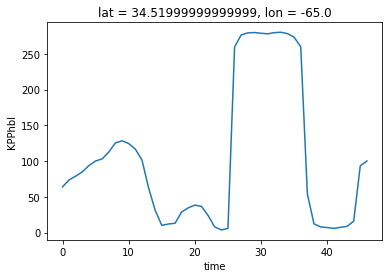

In [40]:
latsel = 34.5
lonsel = -65
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')
%matplotlib inline
hblsel[1:48].plot()

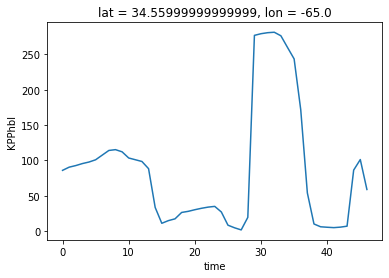

In [42]:
latsel = 34.5+0.04
lonsel = -65
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')
%matplotlib inline
hblsel[1:48].plot()

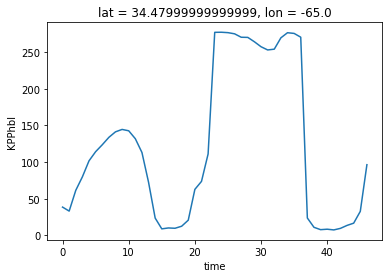

In [43]:
latsel = 34.5-0.04
lonsel = -65
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')
%matplotlib inline
hblsel[1:48].plot()

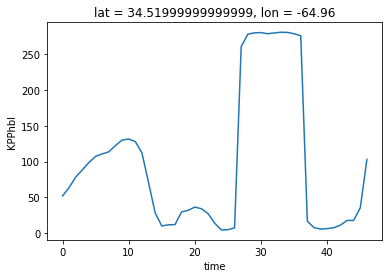

In [127]:
latsel = 34.5
lonsel = -65+0.04
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')
%matplotlib inline
hblsel[1:48].plot()

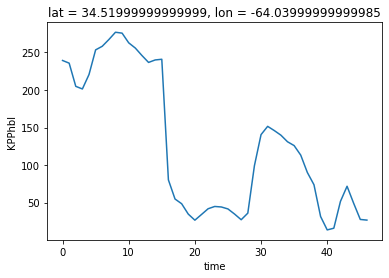

In [13]:
latsel = 34.5
lonsel = -64
hblsel = hbl['KPPhbl'].sel(lat=latsel,lon=lonsel,method='nearest')
zetasel = Zeta['Zeta'].sel(lat=latsel,lon=lonsel,method='nearest')
%matplotlib inline
hblsel[1:48].plot()

There's too much variation on the scale of 1 degree to completely coarse grain the dynamic hbl values over one set of data. You'll need to calculate the h_coarsegrain for every grid point - unless you can pick some rougher resolution that's easier to implement

In [14]:
hblsel[0:48].size

48

In [9]:
hblc = hbl.compute()

Over the course of two days, I would want to go with the times at 12 and 36 because those would correspond to about sunrise over the course of these two days

How do I do this systematically?


Below, I'm workshopping how to determine the max kpp for each 24 hour period. And turning this into an xarray that can go into my balance.

In [10]:
periodnum = hblc.dims['time'] / 24 # this will be useful in the future
#hbl_approx = np.ones()
periodnum = 2 # for now, I will artificially set this as such
periodlength = 24 # a constant
#dtime = 7 #we want kpphbl at 7am
#zoneadjustedfirsttime = dtime - np.round(hblc.coords['lon'].mean() / 15)
#hblc.coords['lon'].mean() / 15
perioddepths = np.empty(periodnum)
hblcoarsegrain = np.empty(0)
for index in range(0,periodnum):
    perioddepths[index] = hblsel[index*periodlength:(index+1)*periodlength].max(dim='time').values
    hblcoarsegrain = np.concatenate((hblcoarsegrain, np.full(periodlength, perioddepths[index])),casting='same_kind')
hblcoarsegrain

array([128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ])

But do we want to blindly pick out 7 am? We should pick out the maximum depth around that time frame, like Dimitris mentioned. This alteration is reflected in the code above

In [11]:
hblsel = hblsel.compute()

In [12]:
hblsel

<xarray.DataArray 'KPPhbl' (time: 72)>
array([ 53.09574127,  63.95734787,  73.8061676 ,  78.98995972,
        85.00411224,  93.86844635, 100.1160202 , 103.16027832,
       112.77469635, 125.4755249 , 128.33195496, 124.48324585,
       116.70347595, 101.6500473 ,  62.71243668,  31.17440605,
        10.20528889,  12.10852146,  13.05450058,  28.85989189,
        34.68092728,  38.49178314,  36.7110939 ,  23.92185402,
         8.00321102,   3.82863259,   5.88199186, 259.41348267,
       276.25973511, 279.08831787, 279.58099365, 278.56140137,
       277.77322388, 279.42352295, 279.9937439 , 278.04537964,
       273.0401001 , 259.57855225,  54.25045776,  12.35835361,
         8.0251894 ,   7.14715528,   5.94121218,   7.45305204,
         8.81312752,  16.01470757,  93.35977173, 100.18600464,
        75.83787537,  62.96040344,  66.01857758,  85.22463226,
       141.10792542, 167.23036194, 170.64349365,  32.14437103,
       150.87767029, 105.40726471, 155.65496826, 144.55358887,
       214.75790405, 209.99446106, 209.28323364, 131.42735291,
        39.65254593,  35.96306229,  40.79031372, 111.28207397,
       102.78026581, 101.16014099, 109.52553558, 137.69947815])
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [13]:
hblcgsel = xr.DataArray(hblcoarsegrain,coords=hblsel.coords, dims = hblsel.dims, name='Hcg' )

In [19]:
hblcgsel

<xarray.DataArray 'Hcg' (time: 48)>
array([128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ])
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

In [17]:
Theta 
T = Theta['Theta'].compute()

In [18]:
HAdv 
H = HAdv['HAdv'].compute()

In [19]:
Z = Zeta['Zeta'].compute()

In [20]:
rhoConst = 1027.5 #kg/m^3
H = hblcgsel #m - we can vary this as a test
Cp = 1*(10**3) # J / (kg K)

In [21]:
qfol = '/nobackup/amondal/NCData/20210811_BudgetBal_2day/'
Q = getNCDataSet(qfol,'oceQnet', 0,1)

Time combined dataset has been opened.
I concatenated the first Z-layer


In [22]:
Q0 = Q['oceQnet'].compute()

In [23]:
HFo = Q0 / (rhoConst*Cp*H)

We'll probably need to make an entirely new function for dynamic averaging now. It will need to split apart arrays and then put them back together. That will be annoying....

Also, I think the above balances are based on an incorrect averaging of the advection terms. That will need to be checked out. You may have had one or two decent balances just from sheer luck. 

In [24]:
Tsel = T.sel(lat=latsel,lon=lonsel,method='nearest')

In [24]:
Tsel

<xarray.DataArray 'Theta' (Zlayers: 33, time: 48)>
array([[19.81446075, 19.80635643, 19.80255699, ..., 21.18659401,
        21.12685013, 21.00930786],
       [19.82118416, 19.81259346, 19.80953598, ..., 21.18574142,
        21.12234116, 21.00159454],
       [19.82374954, 19.81500244, 19.81218338, ..., 21.18420029,
        21.11778259, 20.99443245],
       ...,
       [19.71901131, 19.71638107, 19.74392509, ..., 19.3778553 ,
        19.29236603, 19.24011421],
       [19.31701088, 19.32700348, 19.43437195, ..., 19.03960037,
        18.96020317, 18.90770149],
       [18.58198547, 18.61731529, 18.78703117, ..., 18.53202057,
        18.45063591, 18.42799759]])
Coordinates:
    lat      float64 34.52
    lon      float64 -64.04
Dimensions without coordinates: Zlayers, time

In [25]:
import scipy.io
os.chdir("//nobackup//amondal//Python//Hector_Python_Scripts")
print(os.getcwd())
thk = scipy.io.loadmat('thk90')

thk90 = thk['thk90']
dpt90 = thk['dpt90']
#dpt90
depth_tick_nums = thk['dpt90'][0, 0:90]
#depth_tick_nums
depth = depth_tick_nums
np.max(np.nonzero(np.where(depth < 100, depth, 0)))

/nobackupp12/amondal/Python/Hector_Python_Scripts


21

In [110]:
depth[0]

0.5

In [26]:
from MITllc2160Depth import *

In [119]:
print(depthToZlayer(100))

21


In [122]:
print(zlayerToDepth(5))

7.595000000000001


In [124]:
print(getZlayerThickness(80))

217.09


The above code should also be a function - it's a ridiculous piece of code to constantly be toting around

You also need code to be able to pull up computed version of all the variables more easily.

In [30]:
hblcgsel

<xarray.DataArray 'Hcg' (time: 48)>
array([128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       128.33195496, 128.33195496, 128.33195496, 128.33195496,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ,
       279.9937439 , 279.9937439 , 279.9937439 , 279.9937439 ])
Coordinates:
    lat      float64 34.52
    lon      float64 -65.0
Dimensions without coordinates: time

Below is code that will eventually become a function that creates a sort of "delta" tensor. To handle spatially varying averaging needs, I'm going to create a tensor with dimensions of (lat,lon, Zlayer). For each (lat,lon), there will be a column vector of 0's and 1's - 0's where that Zlayer doesn't need to be counted and 1's where it does. Technically not 1's - more like a weighted average of each thickness...

In [27]:
periodnum = 2 # for now, I will artificially set this as such
periodlength = 24 # a constant
Zlayertot = 33
totaltime = periodnum * periodlength
hblLayer = np.empty((totaltime, Zlayertot))
for timeIndex in range(0, totaltime):
    Zattime = depthToZlayer(hblcgsel.data[timeIndex])
    hblLayer[timeIndex] = np.concatenate((np.ones(Zattime), np.zeros(Zlayertot - Zattime)))

In [61]:
np.max(depth)

200

In [239]:
depth = hblcgsel.data#np.array([50, 100, 200, 10, 5, 2, 4, 18])
t = thk['thk90'][0,0:90]
d = thk['dpt90'][0,0:90]
maxdepth = np.max(depth)
zdim = np.max(np.nonzero(np.where(d<maxdepth,d,0)))
if ((d[zdim] + t[zdim]/2) < maxdepth):
    zdim = zdim + 1
print('zdim:' + np.array2string(zdim))
weightedthickvector = np.empty(depth.shape + (zdim+1,))
for di in range(0,len(depth)):
    zlayer = np.max(np.nonzero(np.where(d<depth[di],d,0)))
    if ((d[zlayer] + t[zlayer]/2) < depth[di]):
        zlayer = zlayer + 1
    print('zlayer = ' + np.array2string(zlayer))
    firstbit = t[0:zlayer]/depth[di]
    middlebit= (1 - (d[zlayer] - t[zlayer]/2)/depth[di])
    wtv= np.append(firstbit, middlebit)
    if ((zdim - len(wtv)) < 0):
        wtv_filled = wtv
    else:
        wtv_filled = np.append(wtv, np.zeros(zdim - len(wtv)+1))
    weightedthickvector[di,:] = wtv_filled

zdim:31
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 23
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31
zlayer = 31


In [244]:
weightedthickvector.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [219]:
firstbit.shape

(16,)

In [227]:
zdim - len(wtv)

11

In [200]:
weightedthickvector[0].sum()

1.1294

In [75]:
zlayer

23

In [76]:
d[23]

124.91499999999999

In [77]:
t[zlayer]

13.87

In [80]:
t[0:1].sum()

1.0

In [81]:
t[0]

1.0

In [179]:
from MITllc2160Depth import getThickWeightedVector
getThickWeightedVector(24).sum()

1.0

In [57]:
depth

array([[ 50, 100, 200],
       [ 60,  80, 120]])

In [56]:
V = np.vectorize(getThickWeightedVector, signature='()->(n)', otypes=[np.ndarray]))

ValueError: could not broadcast input array from shape (22,) into shape (16,)

In [ ]:
Toa = To.mean(dim='Zlayers')
Hadv = -1*UoA * DxToa - VoA*DyToa
HFo = Qo / (rhoConst*Cp*H)
Eko = Zo*Toa / H
dTo = Toa.diff(dim='time') / 3600
Bal = Hadv+HFo + Eko

So I have code now to quickly give use depth from zlayers and vice versa. Now, I have to write a function to time average variables according to different hbl values (hbl values that vary as a function of height). With that, I can test the basic balance. Let's leave that or tomorrow.